# Experimenting with Kedro inside Jupyter notebooks
**Author**: Emmanuel Gyasi Baaye\
**Created**: 2024-08-12\
The Goals of this notebook is to illustrate the potential benefit of kedro and its interaction with Jupyter notebooks.

## Existing Approach to loading data
Currently when we want to load data we sometimes have to write a few lines to maybe a lot more lines in order to get the data we are looking for
1.  loading a CSV where you have to specify a full path. Explicit path ensures data can be found, but is verbose
```
companies = pd.read_csv("/workspaces/KedroDemo/data/01_raw/companies.csv")
```
2. Alternatively you can provide a relative path
```
companies = pd.read_csv("../data/01_raw/companies.csv")
```

Above i printed all the datsets or configs available

# Adding a real vs predicted plot
goal of this section is to illustrate how a potential workflow will start with developing code in a jupyter notebook, then adding the code to an existing pipeline

In [ ]:
# If kernel not already installed, add conda envornment to ipykernels. TODO make sure you don't need to do this
# python -m ipykernel install --user --name kedro2 --display-name "kedro Envrionemnt v2"

In [12]:
%load_ext kedro.ipython
%reload_kedro

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[11/06/24 11:25:12] INFO     Resolved project path as: C:\Dev\KedroDemo.                            ]8;id=51921;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=243909;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py#178\178]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/06/24 11:25:13] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=550870;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=343917;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#64\64]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=44871;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=546314;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri: 'file:///C:/Dev/KedroDemo/mlruns'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=994534;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=428980;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project code                                                     ]8;id=748978;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=918695;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=254212;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=901597;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py#145\145]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=697474;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=215409;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\ipython\__init__.py#151\151]8;;\

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
model = catalog.load("active_modelling_pipeline.regressor")

[11/06/24 11:25:17] INFO     Loading data from active_modelling_pipeline.regressor              ]8;id=636940;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=444917;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\
                             (PickleDataset)...                                                                    

In [15]:
X_test = catalog.load("active_modelling_pipeline.X_test")

[11/06/24 11:25:19] INFO     Loading data from active_modelling_pipeline.X_test (CSVDataset)... ]8;id=745308;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=349755;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

In [16]:
y_test = catalog.load("active_modelling_pipeline.y_test")

[11/06/24 11:25:21] INFO     Loading data from active_modelling_pipeline.y_test (CSVDataset)... ]8;id=422367;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=411768;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

In [17]:
df = catalog.load("processing_pipeline.model_input_table")
df.shape

[11/06/24 11:25:27] INFO     Loading data from processing_pipeline.model_input_table            ]8;id=50135;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=990121;file://c:\Users\emmanuel.gyasibaaye\Anaconda3\envs\kedro-env\lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\
                             (ParquetDataset)...                                                                   

(6027, 27)

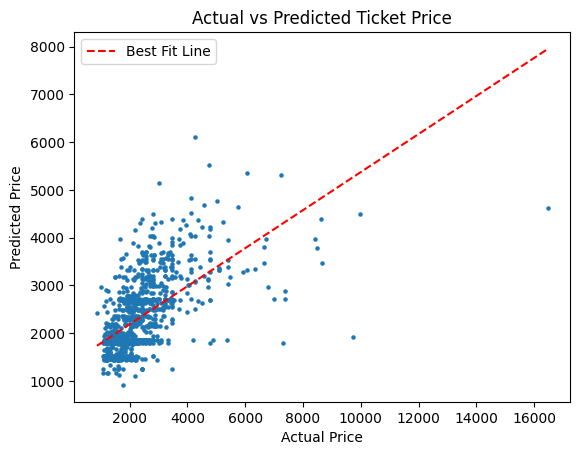

In [27]:
def plotGraph(X_test, y_test, model):
    # calculate Y Prediction
    y_pred = model.predict(X_test)
    # Ensure y_test and y_pred are 1D
    y_test = np.ravel(y_test)
    y_pred = np.ravel(y_pred)
    
    # Scatter plot of actual vs. predicted values
    plt.scatter(y_test, y_pred, s=5)
    
    # Labels and title
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Actual vs Predicted Ticket Price')
    
    # Fit a line to the data (best-fit line)
    fit = np.polyfit(y_test, y_pred, 1)  # Linear fit (degree = 1)
    fit_line = np.poly1d(fit)
    
    # Generate x values for plotting the best-fit line
    x_vals = np.linspace(min(y_test), max(y_test), 100)
    plt.plot(x_vals, fit_line(x_vals), color='red', linestyle='--', label='Best Fit Line')
    
    # Add legend
    plt.legend()
    
    plt.show()

plotGraph(X_test, y_test,model)

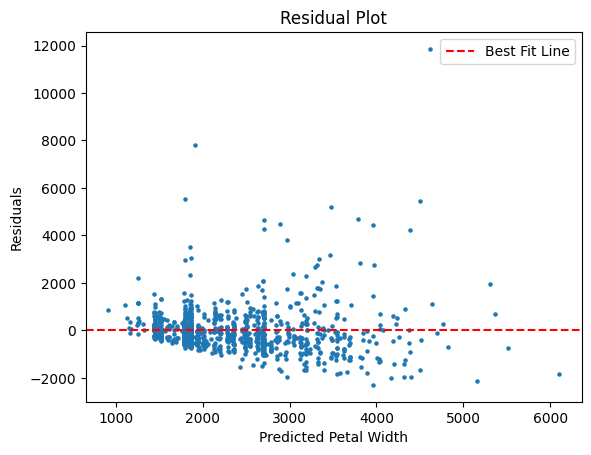

In [24]:
residuals = y_test['price'] - y_pred
plt.scatter(y_pred, residuals, s=5)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--', label='Best Fit Line')

# Add legend
plt.legend()
plt.show()